# [실습] 단변량분석 종합실습 : 직원이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


## 0.환경준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, 	|	범주	|Yes , No		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

In [3]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
attrition = pd.read_csv(path)
attrition.drop(['Education','EducationField', 'EnvironmentSatisfaction', 'JobRole', 'JobInvolvement','NumCompaniesWorked','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
               , axis = 1, inplace = True)
attrition.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
0,No,33,Travel_Rarely,Research & Development,7.0,817,Male,3,Married,11691,No,11,4,0,14,4
1,No,35,Travel_Frequently,Research & Development,18.0,1412,Male,4,Single,9362,No,11,3,0,10,3
2,No,42,Travel_Rarely,Research & Development,6.0,1911,Male,1,Married,13348,No,13,2,1,18,4
3,No,46,Travel_Rarely,Sales,2.0,1204,Female,1,Married,17048,No,23,1,0,28,3
4,No,39,Travel_Frequently,Sales,NaN,1812,Male,4,Divorced,4127,No,18,4,1,7,3


## 숫자형 변수 : 

### ① Age

In [4]:
var= 'Age'

1) 변수의 비즈니스 의미

> 직원 나이

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [5]:
attrition[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [6]:
attrition[var].describe()

count    1250.000000
mean       36.931200
std         9.122162
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

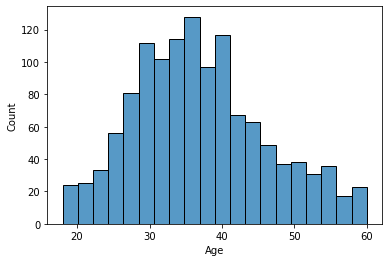

In [7]:
sns.histplot(attrition[var], bins = 20)
plt.show()

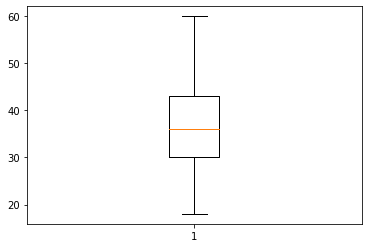

[30. 18.]
[43. 60.]


In [8]:
box = plt.boxplot(attrition[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 30대가 주축을 이루고 있음
* 18세 : 입사 가능 연령
* 60세 : 정년
* 40세 이후에 조금은 급격히 줄어드는 것으로 보아, 이때가 퇴사를 많이 하는 시점으로 보임. (보통 대기업에서 40대에 승진에서 누락되는 사람들, 새로운 분야로 진출하려는 사람들, 창업자들이 많아짐)

7) 추가 분석해 볼 사항이 있나요?

* 적절한(단순히 10살 단위가 아닌) 연령대로 분할하고, 연령대 별로 이직여부(이직율)을 검토해볼 필요가 있음
    * 직원들의 라이프사이클 파악 필요. 대졸, 입사 2~3년차, 5년차, 7년차 등 승진 및 이직을 고려하는 일반적인 시기 등 감안

### ② DistanceFromHome	

In [9]:
var2 = "DistanceFromHome"

1) 변수의 비즈니스 의미

> 집에서 부터의 거리를 의미

2) 숫자, 범주?

In [10]:
attrition[var2].unique()

array([ 7., 18.,  6.,  2., nan,  4., 21.,  8., 20.,  3.,  5., 15.,  1.,
        9., 23., 28., 26., 16., 10., 14., 25., 11., 12., 27., 24., 13.,
       22., 17., 29., 19.])

> 숫자

3) NaN 존재 유무 및 조치방안

> Nan 확인을 진행

In [14]:
attrition[var2].isna().sum()

54

- na값이 54개가 되는것을 확인 할 수 있다.
- 값을 없앨지. 가져갈 지 정해야하는데 0으로 하면 집이랑 가깝다고 하니 제거하는게 나을 것 같다.

In [11]:
# 만약을 대비해서 데이터는 따로 저장을 해놓자.

# 집과의 거리만 따로 저장
attrition_distance = attrition[var2]

In [12]:
attrition_distance.dropna(axis=0, inplace=True)
attrition_distance

0        7.0
1       18.0
2        6.0
3        2.0
5        4.0
        ... 
1244     5.0
1245    19.0
1246     9.0
1247     2.0
1248    16.0
Name: DistanceFromHome, Length: 1196, dtype: float64

In [13]:
attrition_distance.isna().sum()

0

4) 기초통계량(수치화)

In [14]:
attrition_distance.describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

5) 분포 확인(시각화)

Text(0.5, 1.0, 'distance from home violinplot')

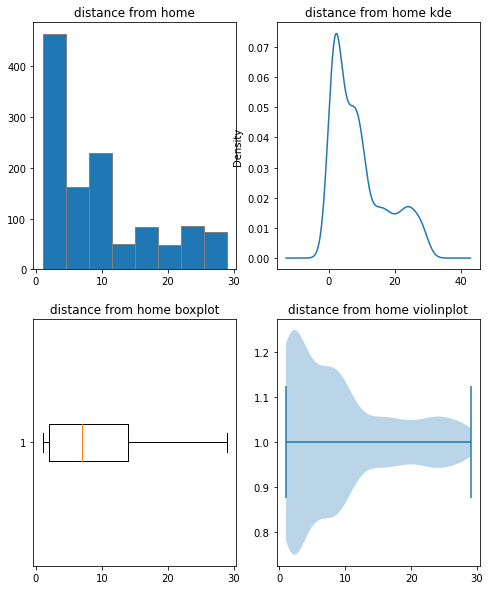

In [24]:
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (8,10))

plt.subplot(2,2,1)
plt.hist(attrition_distance, bins=8, edgecolor = "grey")
plt.title("distance from home")

plt.subplot(2,2,2)
attrition_distance.plot(kind="kde")
plt.title("distance from home kde")

plt.subplot(2,2,3)
plt.boxplot(attrition_distance, vert = False)
plt.title("distance from home boxplot")

plt.subplot(2,2,4)
plt.violinplot(attrition_distance, vert = False)
plt.title("distance from home violinplot")

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

 > 일단 0~ 13km 이내에 75%가 있는것을 확인할 수 있다.<br>
 > 대부분 가까운 곳에서 회사를 다니고 있는 것을 알 수 있다. 하지만 이것만 가지고는 이직과 관련을 지을 수 없으니 이직하는 사람과 아닌 사람의 distance를 확인해보면 좋을 것 같다.
 

7) 추가 분석해 볼 사항이 있나요?

- 이직하는 사람과 아닌사람의 distance를 확인하면 좋을 것 같다. (violin)



### ③ MonthlyIncome

In [26]:
var3 = "MonthlyIncome"

1) 변수의 비즈니스 의미

> 월급

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [27]:
attrition[var3].isna().sum()

0

> 다행이도 없다.
> 만약 월급이 없으면 왜다니는가

4) 기초통계량(수치화)

In [28]:
attrition[var3].describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

5) 분포 확인(시각화)

Text(0.5, 1.0, 'MonthlyIncome violinplot')

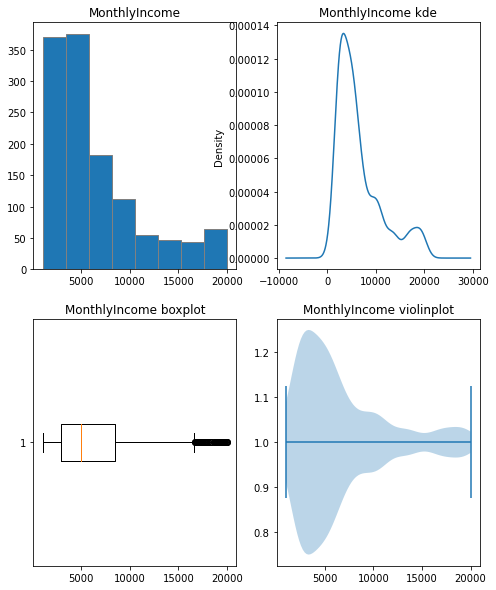

In [29]:
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (8,10))

plt.subplot(2,2,1)
plt.hist(attrition[var3], bins=8, edgecolor = "grey")
plt.title("MonthlyIncome")

plt.subplot(2,2,2)
attrition[var3].plot(kind="kde")
plt.title("MonthlyIncome kde")

plt.subplot(2,2,3)
plt.boxplot(attrition[var3], vert = False)
plt.title("MonthlyIncome boxplot")

plt.subplot(2,2,4)
plt.violinplot(attrition[var3], vert = False)
plt.title("MonthlyIncome violinplot")

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 연봉이 5000이하가 제일 많은 분포를 보이고 있다. 그리고 이상치로 보이는 것에 15000~ 20000사이도 많은 데이터가 있는것을 알 수 있다.

7) 추가 분석해 볼 사항이 있나요?

> 위에랑 같이 이직한사람과 안한사람의 나이별 돈 차이를 보고싶다.

### ④ PercentSalaryHike

In [31]:
var4 = "PercentSalaryHike"

1) 변수의 비즈니스 의미

> 전년대비 급여 인상률

2) 숫자, 범주?

> 무조건 숫자

3) NaN 존재 유무 및 조치방안

In [32]:
attrition[var4].isna().sum()

0

4) 기초통계량(수치화)

In [33]:
attrition[var4].describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

5) 분포 확인(시각화)

Text(0.5, 1.0, 'PercentSalaryHike violinplot')

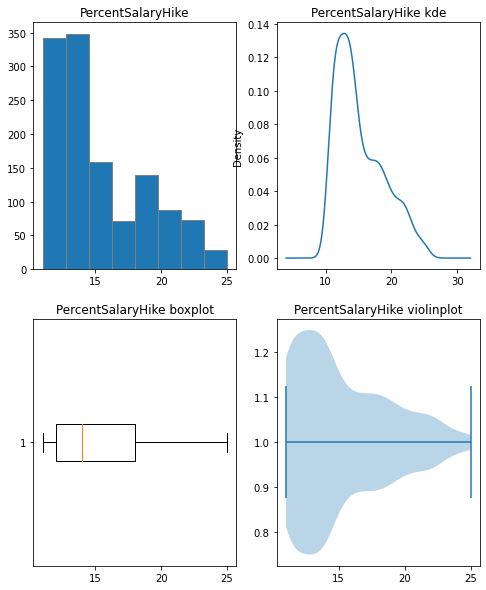

In [34]:
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (8,10))

plt.subplot(2,2,1)
plt.hist(attrition[var4], bins=8, edgecolor = "grey")
plt.title("PercentSalaryHike")

plt.subplot(2,2,2)
attrition[var4].plot(kind="kde")
plt.title("PercentSalaryHike kde")

plt.subplot(2,2,3)
plt.boxplot(attrition[var4], vert = False)
plt.title("PercentSalaryHike boxplot")

plt.subplot(2,2,4)
plt.violinplot(attrition[var4], vert = False)
plt.title("PercentSalaryHike violinplot")

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 10% ~ 20%사이에 대부분이 분포하고있다.<br>
> 인상률이 많은 사람들은 이직을 하는지 안하는지 보면 좋을 것 같다.

### ⑤ TotalWorkingYears

In [35]:
var5 = "TotalWorkingYears"

1) 변수의 비즈니스 의미

> 총 경력 연수

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [36]:
attrition[var5].isna().sum()

0

4) 기초통계량(수치화)

In [37]:
attrition[var5].describe()

count    1250.00000
mean       11.33920
std         7.79687
min         0.00000
25%         6.00000
50%        10.00000
75%        15.00000
max        40.00000
Name: TotalWorkingYears, dtype: float64

5) 분포 확인(시각화)

Text(0.5, 1.0, 'TotalWorkingYears violinplot')

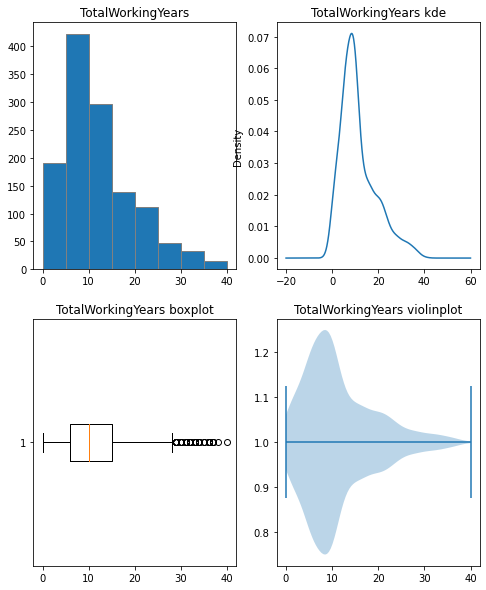

In [38]:
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (8,10))

plt.subplot(2,2,1)
plt.hist(attrition[var5], bins=8, edgecolor = "grey")
plt.title("TotalWorkingYears")

plt.subplot(2,2,2)
attrition[var5].plot(kind="kde")
plt.title("TotalWorkingYears kde")

plt.subplot(2,2,3)
plt.boxplot(attrition[var5], vert = False)
plt.title("TotalWorkingYears boxplot")

plt.subplot(2,2,4)
plt.violinplot(attrition[var5], vert = False)
plt.title("TotalWorkingYears violinplot")

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 경력연수가 10년을 기점으로 나가는 사람이 많아지고 있다. <br>
> 특히 10년 15년을 기점으로는 많이 나가는것으로 보아 무슨 문제가 있는지 파악을 하면 좋을 것 같다.

## 범주형 변수

### ① Attrition

In [39]:
var = 'Attrition'

1) 변수의 비즈니스 의미

> 직원 이직여부

2) 숫자, 범주?

In [40]:
attrition[var].unique()

array(['No', 'Yes'], dtype=object)

> * 범주형 데이터
* 범주 종류 Yes , No

3) NaN 존재 유무 및 조치방안

In [41]:
attrition[var].isna().sum()

0

> * NA 없음
* 당연히 Target이기에 NA가 있으면 안됨!


4) 가변수화 필요 여부

> * Yes , No로 되어 있음. 
* 1, 0으로 변환해야 함.

In [42]:
# 변환 코드
# attrtion['Attrition'] = np.where(attrtion['Attrition'] == 'Yes', 1, 0)

5) 기초통계량(수치화)

In [43]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

No     1050
Yes     200
Name: Attrition, dtype: int64
No     0.84
Yes    0.16
Name: Attrition, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


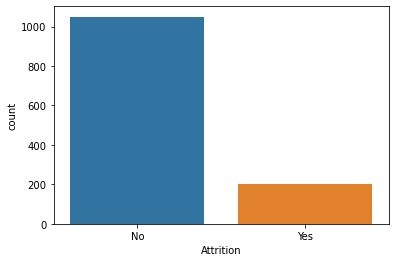

In [44]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 1196명 직원
* 이직자 : 195명, 이직율 : 0.163
* 이직율이 16.3% 는 적정한가? 동종 업계 수준은? 전년대비?

8) 추가 분석해 볼 사항이 있나요?

> * Attribute가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② OverTime	

In [45]:
var2 = "OverTime"

1) 변수의 비즈니스 의미

> 야근 여부

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [46]:
attrition[var2].isna().sum()

0

4) 가변수화 필요 여부

In [47]:
attrition[var2].unique()

array(['No', 'Yes'], dtype=object)

> 필요하다.

In [48]:
attrition[var2] = np.where(attrition[var2] == "Yes", 1, 0)

In [49]:
attrition[var2].unique()

array([0, 1])

5) 기초통계량(수치화)

In [50]:
print(attrition[var2].value_counts())
print(attrition[var2].value_counts()/ len(attrition[var2]))

0    896
1    354
Name: OverTime, dtype: int64
0    0.7168
1    0.2832
Name: OverTime, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


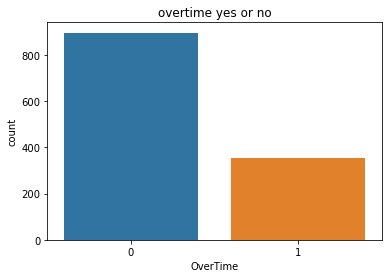

In [53]:
sns.countplot(attrition[var2])
plt.title("overtime yes or no")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 야근 하는 사람의 비율이 거의 30%가까이 된다. <br>
> 야근율을 낮추는 형식으로 갈 수 있는지 확인해보자.<br>
> 추가적으로 야근을 하는 사람의 이직률이 얼마나 되는지도 알아보면 좋을 것 같다.<br>


### ③ MaritalStatus

In [54]:
var3 = "MaritalStatus"

1) 변수의 비즈니스 의미

> 결혼상태

2) 숫자, 범주?

In [55]:
attrition[var3].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

> 범주형이다

3) NaN 존재 유무 및 조치방안

In [56]:
attrition[var3].isna().sum()

0

4) 가변수화 필요 여부

> 필요하다

In [57]:
attrition[var3] = attrition[var3].map({
    "Single" : 0,
    "Married" : 1,    
    "Divorced" : 2
})
attrition[var3].unique()

array([1, 0, 2], dtype=int64)

5) 기초통계량(수치화)

In [58]:
print(attrition[var3].value_counts())
print(attrition[var3].value_counts()/ len(attrition[var3]))

1    570
0    404
2    276
Name: MaritalStatus, dtype: int64
1    0.4560
0    0.3232
2    0.2208
Name: MaritalStatus, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


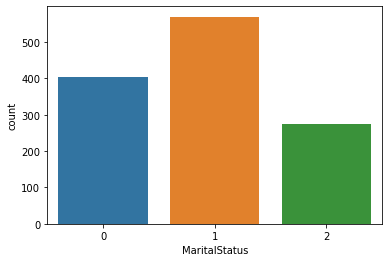

In [64]:
sns.countplot(attrition[var3])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 왜 그런지 모르겠지만 이혼률이 생각보다 높다. <br>
> 왜 이혼률이 높은지 생각을 해봐야할 것 같다. <br>
> 추가적으로 각 과정마다 얼마나 이직에 관련있는지도 보면 좋을 것 같다.

### ④ JobSatisfaction

In [59]:
var4 = "JobSatisfaction"

1) 변수의 비즈니스 의미

> 직무 만족도

2) 숫자, 범주?

In [60]:
attrition[var4].unique()

array([3, 4, 1, 2], dtype=int64)

In [61]:
attrition[var4].value_counts()

4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64

3) NaN 존재 유무 및 조치방안

In [62]:
attrition[var4].isna().sum()

0

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [63]:
print(attrition[var4].value_counts())
print(attrition[var4].value_counts()/ len(attrition[var4]))

4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64
4    0.3176
3    0.2944
1    0.2000
2    0.1880
Name: JobSatisfaction, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


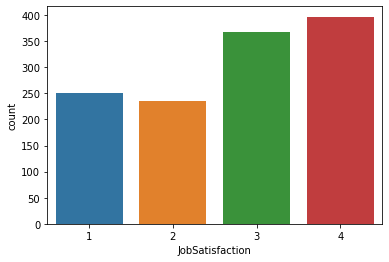

In [64]:
sns.countplot(attrition[var4])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 전체적으로 다들 만족하는 삶을 가지고 있는것으로 보인다. <br>
> 하지만 모든 데이터가 그런 것 처럼 이직과 얼마나 관련이 있는지는 구분을 해서 보아야한다.

8) 추가 분석해 볼 사항이 있나요?

## 추가 분석

### 이직을 했는 사람과 아닌 사람 나누기

In [67]:
attrition_yes = attrition[attrition["Attrition"] == "Yes"]
attrition_no = attrition[attrition["Attrition"] == "No"]

attrition_yes

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
5,Yes,22,Travel_Frequently,Research & Development,4.0,593,Male,3,0,3894,0,16,3,0,4,3
10,Yes,24,Travel_Rarely,Sales,3.0,720,Female,3,0,4577,0,14,1,0,4,3
12,Yes,33,Travel_Rarely,Research & Development,15.0,582,Male,3,1,13610,1,12,4,0,15,4
18,Yes,58,Travel_Frequently,Research & Development,2.0,918,Male,4,2,2380,1,14,4,1,3,2
22,Yes,32,Travel_Rarely,Research & Development,7.0,1309,Male,3,1,4883,0,18,1,1,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,Yes,34,Travel_Frequently,Human Resources,23.0,590,Female,1,2,9950,1,15,3,3,11,3
1216,Yes,19,Non-Travel,Research & Development,NaN,1248,Female,2,0,1859,1,25,2,0,1,4
1227,Yes,22,Travel_Frequently,Research & Development,3.0,1203,Male,4,1,2853,1,11,2,1,1,3
1230,Yes,19,Travel_Rarely,Sales,21.0,959,Male,2,0,2121,1,13,2,0,1,4


In [68]:
attrition_no

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
0,No,33,Travel_Rarely,Research & Development,7.0,817,Male,3,1,11691,0,11,4,0,14,4
1,No,35,Travel_Frequently,Research & Development,18.0,1412,Male,4,0,9362,0,11,3,0,10,3
2,No,42,Travel_Rarely,Research & Development,6.0,1911,Male,1,1,13348,0,13,2,1,18,4
3,No,46,Travel_Rarely,Sales,2.0,1204,Female,1,1,17048,0,23,1,0,28,3
4,No,39,Travel_Frequently,Sales,NaN,1812,Male,4,2,4127,0,18,4,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,No,27,Travel_Rarely,Research & Development,19.0,1619,Male,1,2,4066,0,11,1,2,7,3
1246,No,29,Travel_Rarely,Research & Development,9.0,1558,Male,3,1,2451,0,18,1,2,5,2
1247,No,29,Non-Travel,Sales,2.0,469,Male,3,1,4649,0,14,1,1,4,2
1248,No,43,Travel_Rarely,Sales,16.0,327,Female,4,1,16064,1,22,3,1,22,3


#### 1. 거리에 따른 이직률이 증가할 것이다.

> 바이올린 플롯으로 확인을 해보자.

Text(0.5, 1.0, 'attrition by distance')

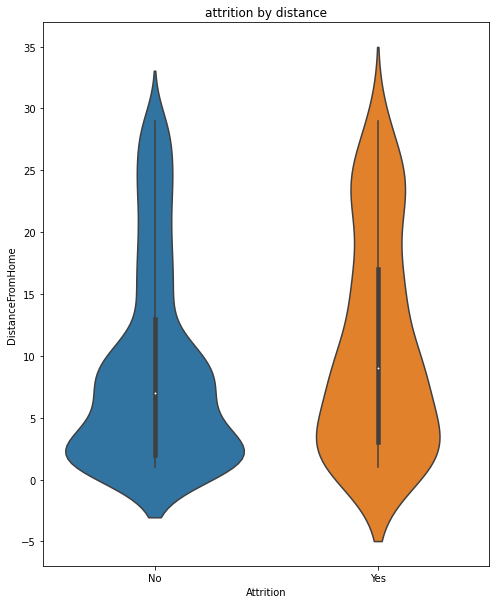

In [70]:
plt.figure(figsize = (8,10))
sns.violinplot(x='Attrition', y='DistanceFromHome', data = attrition)
plt.title("attrition by distance")

> 원래 생각한 멀수록 이직밀도가 높을 것이다라는것과는 다른 그림이 보여서 비율로 확인을 해봐야겠다고 느꼈다.<br>
> 범주에서 사용하던 방식을 가져와서 그려보자.

In [91]:
print(attrition_yes["DistanceFromHome"].value_counts())
print(attrition_yes["DistanceFromHome"].value_counts()/ len(attrition_yes["DistanceFromHome"]))

2.0     24
1.0     21
9.0     13
3.0     11
24.0    11
8.0     10
7.0      9
4.0      8
5.0      8
16.0     7
10.0     7
15.0     5
22.0     5
25.0     5
23.0     5
6.0      5
12.0     4
13.0     4
18.0     4
14.0     4
17.0     4
11.0     4
29.0     4
21.0     3
27.0     3
28.0     2
26.0     2
19.0     2
20.0     1
Name: DistanceFromHome, dtype: int64
2.0     0.120
1.0     0.105
9.0     0.065
3.0     0.055
24.0    0.055
8.0     0.050
7.0     0.045
4.0     0.040
5.0     0.040
16.0    0.035
10.0    0.035
15.0    0.025
22.0    0.025
25.0    0.025
23.0    0.025
6.0     0.025
12.0    0.020
13.0    0.020
18.0    0.020
14.0    0.020
17.0    0.020
11.0    0.020
29.0    0.020
21.0    0.015
27.0    0.015
28.0    0.010
26.0    0.010
19.0    0.010
20.0    0.005
Name: DistanceFromHome, dtype: float64


In [92]:
dis_no = attrition_yes["DistanceFromHome"].value_counts()/ len(attrition_yes["DistanceFromHome"])
df_dis_no = pd.DataFrame(dis_no).reset_index().sort_values(by="index")
df_dis_no.columns = ["distance", "ratio"]

In [93]:
df_dis_no

,distance,ratio
1,1.0,0.105
0,2.0,0.120
3,3.0,0.055
7,4.0,0.040
8,5.0,0.040
15,6.0,0.025
6,7.0,0.045
5,8.0,0.050
2,9.0,0.065
10,10.0,0.035


Text(0.5, 1.0, 'attrition by distance')

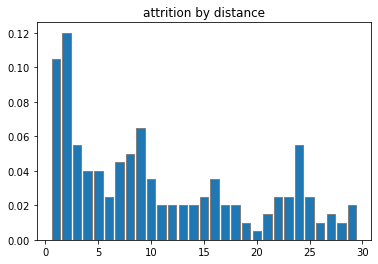

In [94]:
plt.bar(df_dis_no["distance"], df_dis_no["ratio"], edgecolor="gray")
plt.title("attrition by distance")

> 비율로 보았을때도 거리가 가까운 사람들의 이직률이 높은것을 확인할 수 있다. <br>
> 아마 기숙사에 타지에서 있다가 기숙사로 들어온 사람들이 많이 나간것이 아닐까 생각을 해볼수 있다.<br>
> 기숙사에 살고있는 것도 알 수 있다면 좋을 것 같다.

#### 월급 높은사람도 이직률이 높을까?

Text(0.5, 1.0, 'attrition by income')

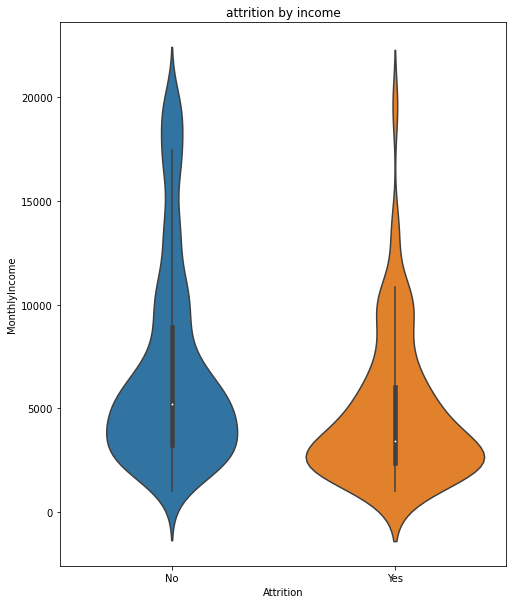

In [95]:
plt.figure(figsize = (8,10))
sns.violinplot(x='Attrition', y='MonthlyIncome', data = attrition)
plt.title("attrition by income")

> 오우 연봉이 어느정도 높으면 이직률이 많이 감소하는것같다. 이 업계에서 초봉으로 주는 금액인 3000~ 5000사이에서 많이 나가고 들어오는것 같다

#### 야근은 이직률에 관련이 있을것이다.

Text(0.5, 1.0, 'attrition by Overtime')

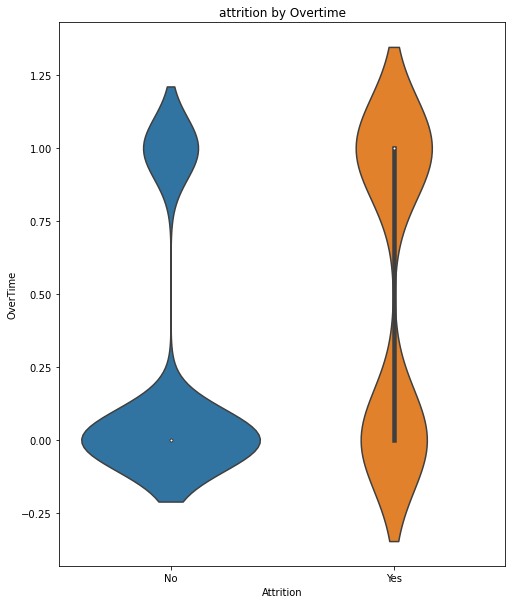

In [96]:
plt.figure(figsize = (8,10))
sns.violinplot(x='Attrition', y='OverTime', data = attrition)
plt.title("attrition by Overtime")

> Overtime은 범주형이다보니 이상한 바이올린 그림이 나왔다. 그래도 확실히 알 수 있는것은 야근이 있으면 이직에 영향을 많이 주는것 같다.